## Weather forecasting using tensorflow library

### Importing Needed Packages

In [46]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



### Reading CSV file as weather_df and making date_time column as index of dataframe

In [47]:
df = pd.read_csv('kanpur.csv', parse_dates=['date_time'], index_col='date_time')
df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,11,21,17,50,0.0,1015,11,10,320,10
2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,22,11,52,0.0,1015,11,10,315,11
2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,6,55,0.0,1015,11,10,310,11
2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,0,57,0.0,1015,10,10,304,12
2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,14,19,0,54,0.0,1016,11,10,302,11


### Checking columns in our dataframe

In [48]:
df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

### Now shape

In [49]:
df.shape

(96432, 24)

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
maxtempC,96432.0,33.400199,6.994211,15.0,28.0,34.0,38.0,51.0
mintempC,96432.0,22.374564,7.635253,3.0,16.0,24.0,28.0,39.0
totalSnow_cm,96432.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
sunHour,96432.0,11.037805,2.152973,4.0,8.7,11.6,13.0,13.9
uvIndex,96432.0,6.877053,1.551294,3.0,6.0,7.0,8.0,11.0
uvIndex.1,96432.0,4.465012,3.414374,1.0,1.0,5.0,8.0,11.0
moon_illumination,96432.0,46.094077,31.249725,0.0,18.0,46.0,73.0,100.0
DewPointC,96432.0,13.230629,8.053778,-14.0,7.0,12.0,21.0,31.0
FeelsLikeC,96432.0,30.735783,9.320398,4.0,24.0,31.0,38.0,65.0
HeatIndexC,96432.0,30.868840,9.177540,7.0,25.0,31.0,38.0,65.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96432 entries, 2009-01-01 00:00:00 to 2020-01-01 23:00:00
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtempC           96432 non-null  int64  
 1   mintempC           96432 non-null  int64  
 2   totalSnow_cm       96432 non-null  float64
 3   sunHour            96432 non-null  float64
 4   uvIndex            96432 non-null  int64  
 5   uvIndex.1          96432 non-null  int64  
 6   moon_illumination  96432 non-null  int64  
 7   moonrise           96432 non-null  object 
 8   moonset            96432 non-null  object 
 9   sunrise            96432 non-null  object 
 10  sunset             96432 non-null  object 
 11  DewPointC          96432 non-null  int64  
 12  FeelsLikeC         96432 non-null  int64  
 13  HeatIndexC         96432 non-null  int64  
 14  WindChillC         96432 non-null  int64  
 15  WindGustKmph       96432 non-null  

In [52]:
# dropping columns which are not required

df = df.drop(['moon_illumination', 'moonrise','moonset','uvIndex.1',
              'sunrise','sunset','uvIndex.1','FeelsLikeC','WindChillC'], axis=1)

# Ploting all the column values for 1 year

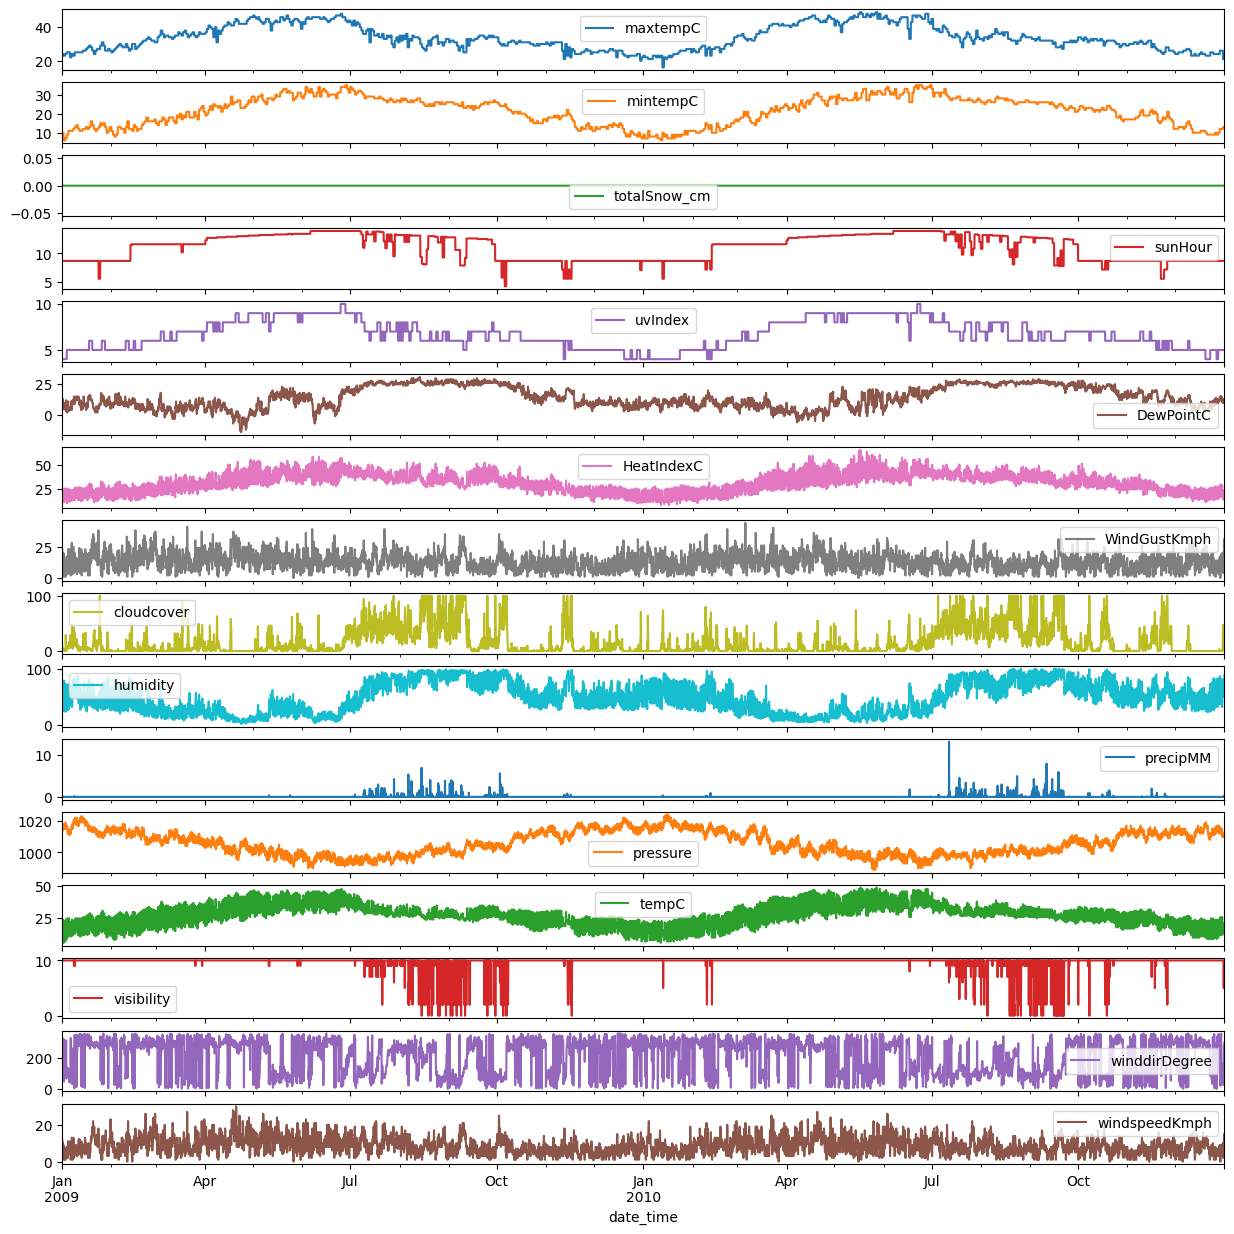

In [53]:
# plotting the columns to see the trend for 2009-2010

df['2009':'2010'].plot(subplots=True, figsize=(15, 15))
plt.show()






array([[<Axes: title={'center': 'maxtempC'}>,
        <Axes: title={'center': 'mintempC'}>,
        <Axes: title={'center': 'totalSnow_cm'}>,
        <Axes: title={'center': 'sunHour'}>],
       [<Axes: title={'center': 'uvIndex'}>,
        <Axes: title={'center': 'DewPointC'}>,
        <Axes: title={'center': 'HeatIndexC'}>,
        <Axes: title={'center': 'WindGustKmph'}>],
       [<Axes: title={'center': 'cloudcover'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'precipMM'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'tempC'}>,
        <Axes: title={'center': 'visibility'}>,
        <Axes: title={'center': 'winddirDegree'}>,
        <Axes: title={'center': 'windspeedKmph'}>]], dtype=object)

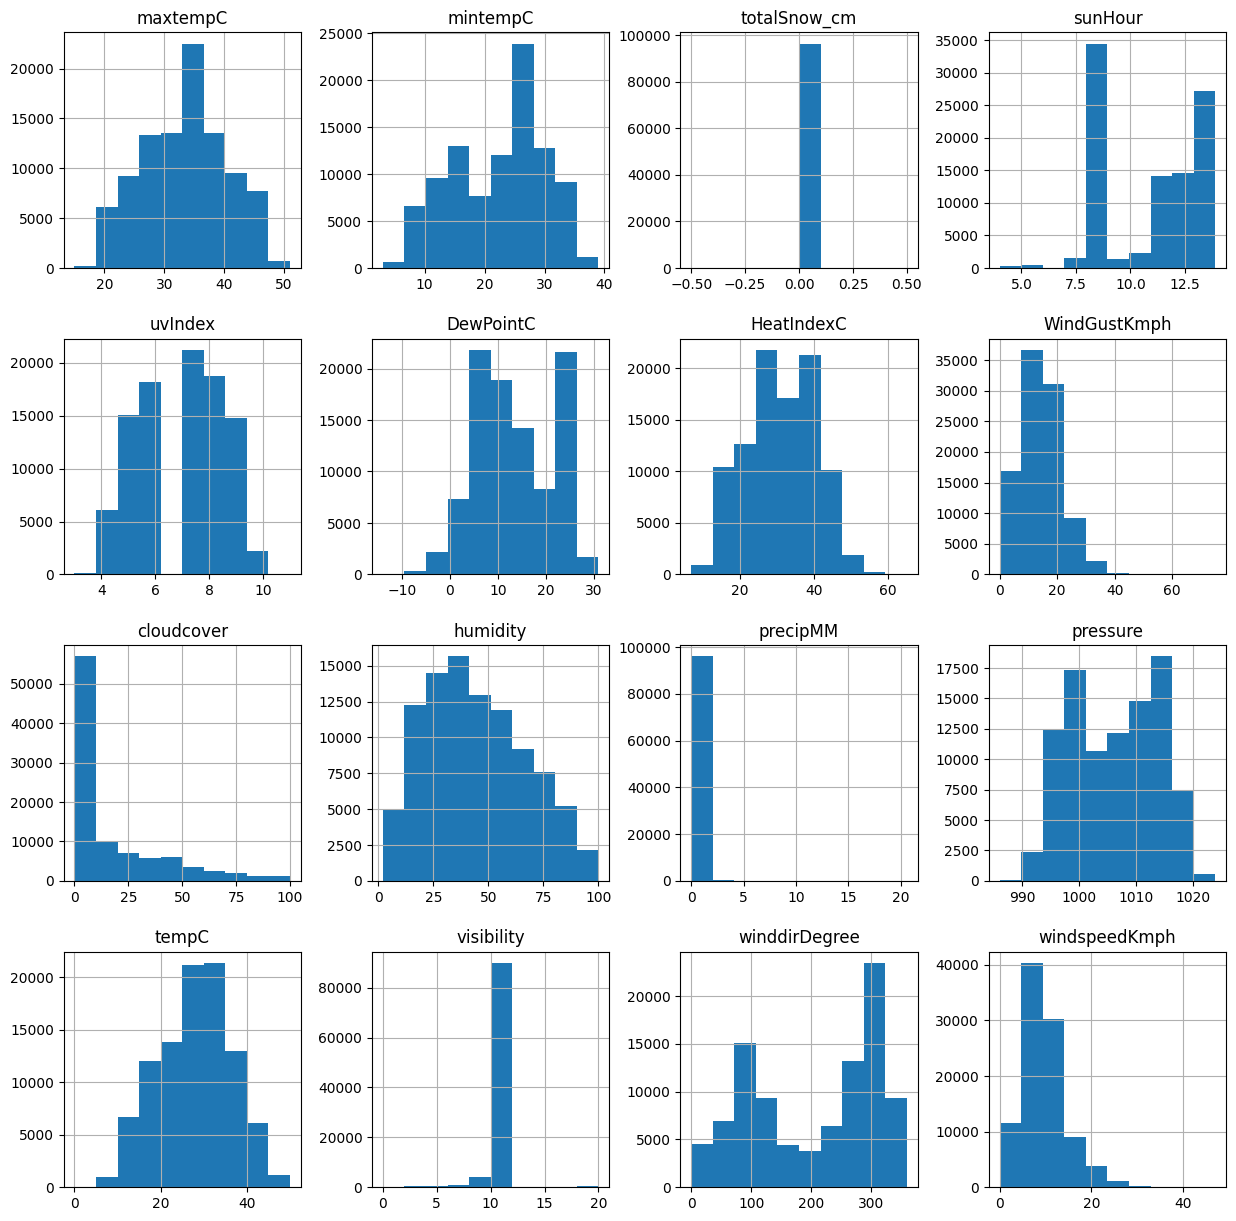

In [54]:
# plotting histogram for all the columns

df.hist(bins=10,figsize=(15,15))

### Now our dataset is prepared and it is ready to be fed to the model for training.

In [55]:
# scaling the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

df_scaled.head()


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,HeatIndexC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,0.25,0.194444,0.0,0.474747,0.125,0.355556,0.086207,0.280000,0.17,0.489796,0.0,0.763158,0.22,0.5,0.888889,0.212766
2009-01-01 01:00:00,0.25,0.194444,0.0,0.474747,0.125,0.377778,0.103448,0.293333,0.11,0.510204,0.0,0.763158,0.22,0.5,0.875000,0.234043
2009-01-01 02:00:00,0.25,0.194444,0.0,0.474747,0.125,0.400000,0.103448,0.306667,0.06,0.540816,0.0,0.763158,0.22,0.5,0.861111,0.234043
2009-01-01 03:00:00,0.25,0.194444,0.0,0.474747,0.125,0.422222,0.103448,0.306667,0.00,0.561224,0.0,0.763158,0.20,0.5,0.844444,0.255319
2009-01-01 04:00:00,0.25,0.194444,0.0,0.474747,0.125,0.422222,0.120690,0.253333,0.00,0.530612,0.0,0.789474,0.22,0.5,0.838889,0.234043


In [57]:
# splitting the data into x and y

X = df_scaled.drop('tempC', axis=1)
y = df_scaled['tempC']

X.head()





,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,HeatIndexC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,
2009-01-01 00:00:00,0.25,0.194444,0.0,0.474747,0.125,0.355556,0.086207,0.280000,0.17,0.489796,0.0,0.763158,0.5,0.888889,0.212766
2009-01-01 01:00:00,0.25,0.194444,0.0,0.474747,0.125,0.377778,0.103448,0.293333,0.11,0.510204,0.0,0.763158,0.5,0.875000,0.234043
2009-01-01 02:00:00,0.25,0.194444,0.0,0.474747,0.125,0.400000,0.103448,0.306667,0.06,0.540816,0.0,0.763158,0.5,0.861111,0.234043
2009-01-01 03:00:00,0.25,0.194444,0.0,0.474747,0.125,0.422222,0.103448,0.306667,0.00,0.561224,0.0,0.763158,0.5,0.844444,0.255319
2009-01-01 04:00:00,0.25,0.194444,0.0,0.474747,0.125,0.422222,0.120690,0.253333,0.00,0.530612,0.0,0.789474,0.5,0.838889,0.234043


In [58]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape



((77145, 15), (19287, 15))

In [67]:
# building the model using tensorflow

import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential

model = Sequential(
    [
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')

    ]
)


# compiling the model

model.compile(optimizer='adam', loss='mse', metrics=['r2_score'])

# training the model

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0059 - r2_score: 0.7865 - val_loss: 5.7620e-04 - val_r2_score: 0.9800
Epoch 2/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3.5857e-04 - r2_score: 0.9874 - val_loss: 3.0514e-04 - val_r2_score: 0.9894
Epoch 3/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 3.4490e-04 - r2_score: 0.9879 - val_loss: 3.1469e-04 - val_r2_score: 0.9891
Epoch 4/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2.9612e-04 - r2_score: 0.9897 - val_loss: 3.6074e-04 - val_r2_score: 0.9875
Epoch 5/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2.9571e-04 - r2_score: 0.9897 - val_loss: 2.7016e-04 - val_r2_score: 0.9906
Epoch 6/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 3.1615e-04 - r2_score: 0.9890 - val_loss: 2.9007e-04 - val_r2_score: 0.9899
Epoch 7/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.7971e-04 - r2_score: 0.9902 - val_loss: 2.6599e-04 - val_r2_score: 0.9908
Epoch 8/10
1929/1929 ━━━━━━━━━━━━━━━

In [66]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,253 (145.52 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,836 (97.02 KB)

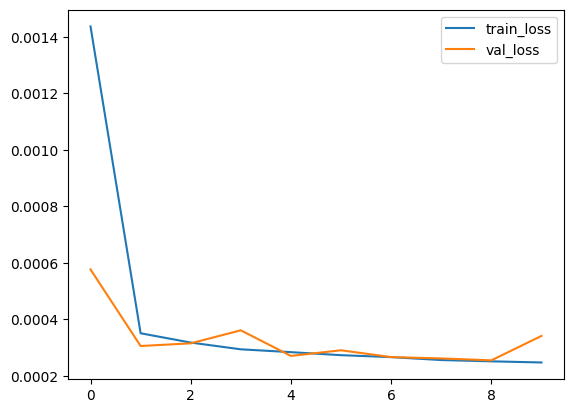

In [68]:
# plotting the loss and r2_score

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [69]:
# predicting the model

y_pred = model.predict(X_test)

r2_score(y_test, y_pred)



603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


0.9865210225796484